In [120]:
import torch
from torch import nn


In [121]:
device='cuda' if torch.cuda.is_available() else 'cpu'

In [122]:
#importing the data
import requests
import zipfile
from pathlib import Path

data_path=Path('data/')
image_path=data_path/'pizza_steak_sushi'

if image_path.is_dir():
  print(f'{image_path} directory exists. ')

else:
  print(f'didnot find {image_path} directory, so creating one...')
  image_path.mkdir(parents=True, exist_ok=True)

  #downloading pizza,steak and sushi data

  with open(data_path/'pizza_steak_sushi.zip','wb') as f:
    request=requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip')
    print('downloading file')
    f.write(request.content)

  with zipfile.ZipFile(data_path/'pizza_steak_sushi.zip','r') as zip_ref:
    print('unzipping data')
    zip_ref.extractall(image_path)

data/pizza_steak_sushi directory exists. 


# Becoming one with the data

In [123]:
import os
def walk_through_dir(dir_path):
  for dirpath,dirnames,filenames in os.walk(dir_path):
    print(f'there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

walk_through_dir(image_path)

there are 2 directories and 0 images in data/pizza_steak_sushi
there are 3 directories and 0 images in data/pizza_steak_sushi/train
there are 0 directories and 75 images in data/pizza_steak_sushi/train/steak
there are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi
there are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza
there are 3 directories and 0 images in data/pizza_steak_sushi/test
there are 0 directories and 19 images in data/pizza_steak_sushi/test/steak
there are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi
there are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza


In [124]:
#setting up train and test path
train_dir=image_path/'train'
test_dir=image_path/'test'
train_dir,test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

random image path: data/pizza_steak_sushi/train/steak/214320.jpg
random image class: steak
random image height: 383
random image weidth: 512


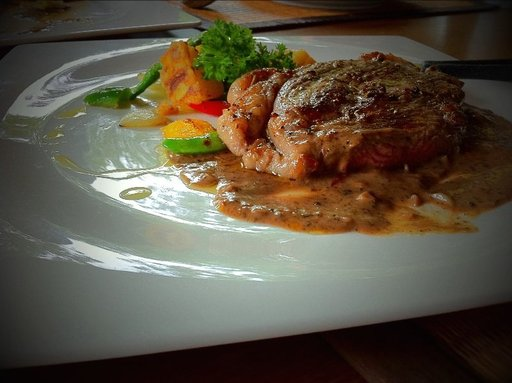

In [125]:
#visualizing images
import random
from PIL import Image

random.seed(42)
image_path_list=list(image_path.glob('*/*/*.jpg'))

#get random image path
random_image_path=random.choice(image_path_list)

#get image class from path name
image_class=random_image_path.parent.stem

img=Image.open(random_image_path)

print(f'random image path: {random_image_path}')

print(f'random image class: {image_class}')

print(f'random image height: {img.height}')

print(f'random image weidth: {img.width}')
img


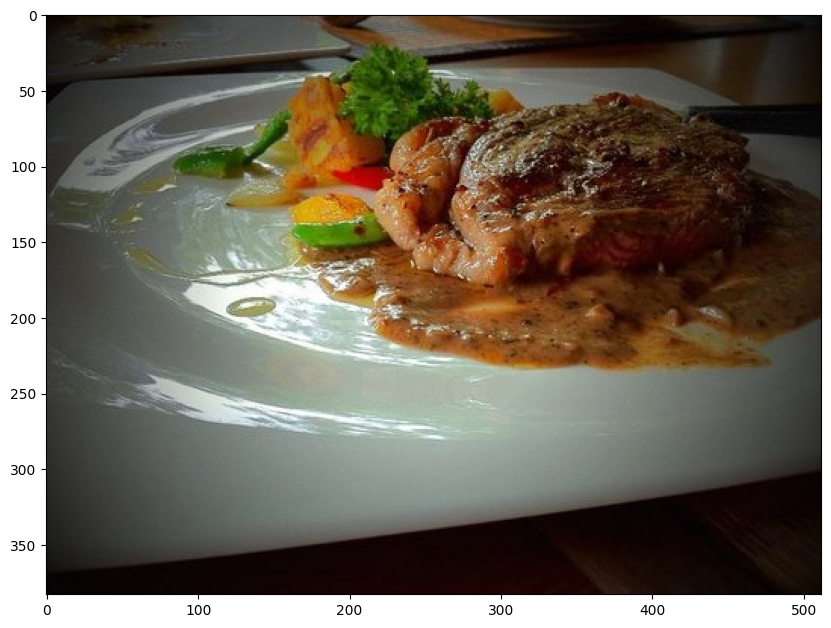

In [126]:
#we can do same using plt but first we need t convert it to numpy array
import numpy as np
import matplotlib.pyplot as plt
#turn image to array
img_as_array=np.asarray(img)
plt.figure(figsize=(10,10))
plt.imshow(img_as_array)


In [127]:
#transforming data
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


In [128]:
#write transform for image
data_transform=transforms.Compose([transforms.Resize(size=(64,64)),
                                   transforms.RandomHorizontalFlip(p=0.5),
                                   transforms.ToTensor()
                                   ])

In [129]:
data_transform(img),data_transform(img).shape

(tensor([[[0.0549, 0.0667, 0.0745,  ..., 0.1020, 0.0627, 0.0392],
          [0.0588, 0.0549, 0.0471,  ..., 0.1098, 0.0941, 0.0667],
          [0.0667, 0.0863, 0.0980,  ..., 0.1137, 0.1059, 0.0863],
          ...,
          [0.0863, 0.1020, 0.1098,  ..., 0.0627, 0.0627, 0.0549],
          [0.0784, 0.0902, 0.1059,  ..., 0.0275, 0.0275, 0.0196],
          [0.0667, 0.0824, 0.0824,  ..., 0.0275, 0.0235, 0.0196]],
 
         [[0.0588, 0.0706, 0.0784,  ..., 0.0627, 0.0353, 0.0235],
          [0.0510, 0.0510, 0.0392,  ..., 0.0902, 0.0667, 0.0431],
          [0.0549, 0.0706, 0.0863,  ..., 0.1059, 0.0941, 0.0706],
          ...,
          [0.0471, 0.0588, 0.0588,  ..., 0.0471, 0.0471, 0.0471],
          [0.0431, 0.0510, 0.0588,  ..., 0.0118, 0.0118, 0.0157],
          [0.0392, 0.0471, 0.0431,  ..., 0.0118, 0.0118, 0.0118]],
 
         [[0.0549, 0.0706, 0.0863,  ..., 0.0314, 0.0157, 0.0196],
          [0.0392, 0.0392, 0.0392,  ..., 0.0588, 0.0392, 0.0275],
          [0.0353, 0.0510, 0.0745,  ...,

In [130]:
def plot_transformed_images(image_paths,transform, n=3,seed=42):
  random.sedd(42)
  random_image_path=random.sample(image_paths,k=n)

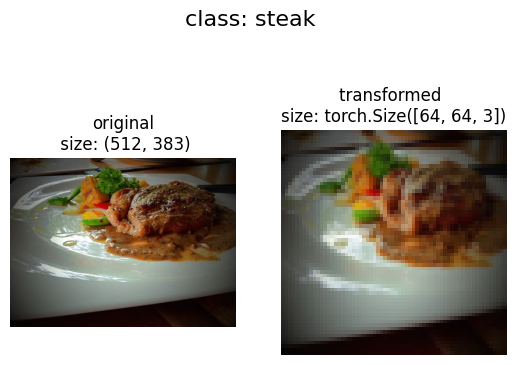

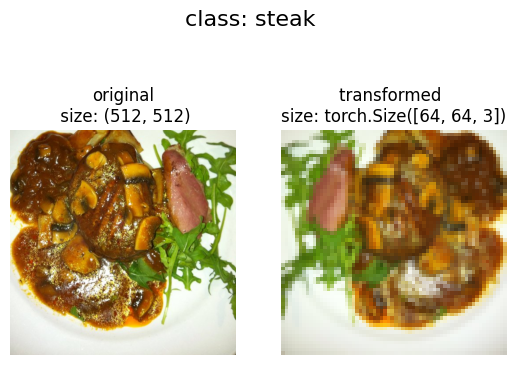

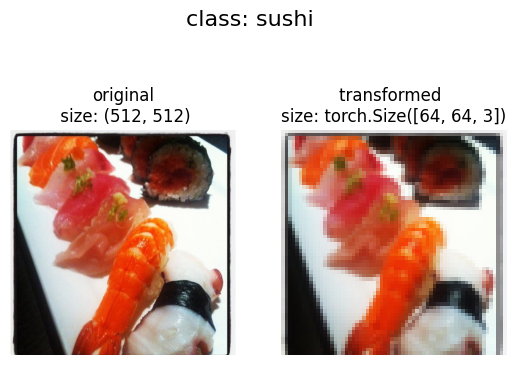

In [131]:
def plot_transformed_image(image_path, transform , n=3, seed =42):

  random.seed(42)
  random_image_path=random.sample(image_path,k=n)
  for image_path in random_image_path:
    with Image.open(image_path) as f:
      fig, ax=plt.subplots(1, 2)
      ax[0].imshow(f)
      ax[0].set_title(f'original\n size: {f.size}')
      ax[0].axis('off')

    #transforming and plotting the transformed image

      img_transformed=transform(f).permute(1,2,0)
      # fig,ax=plt.subplots(2,2)
      ax[1].imshow(img_transformed)
      ax[1].set_title(f'transformed \nsize: {img_transformed.shape}')
      ax[1].axis('off')

      fig.suptitle(f'class: {image_path.parent.stem}', fontsize=16)


plot_transformed_image(image_path_list,transform=data_transform)


In [132]:
#loading image data using imagefolder
from torchvision import datasets
train_data=datasets.ImageFolder(root=train_dir,
                                transform=data_transform)
test_data=datasets.ImageFolder(root=test_dir,
                                transform=data_transform)

print(f'train data: {train_data} \n test data : {test_data}')

train data: Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           ) 
 test data : Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [133]:
#getting a class name:
class_names=train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [134]:
#we can also get class names as a dict
class_dict=train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [135]:
len(train_data),len(test_data)

(225, 75)

In [136]:
img,label=train_data[0][0],train_data[0][1]
img,label

(tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
          [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
          [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
          ...,
          [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
          [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
          [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],
 
         [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
          [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
          [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
          ...,
          [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
          [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
          [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],
 
         [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
          [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
          [0.0196, 0.0157, 0.0157,  ...,

In [137]:
img,label=train_data[0][0],train_data[0][1]
print(f'image tensor: {img}')
print(f'image shape: {img.shape}')
print(f'image datatype: {img.dtype}')
print(f'image label: {label}')
print(f'label datatype: {type(label)}')

image tensor: tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.09

befoe permute ie original shape: torch.Size([3, 64, 64])
after permute ie permute shape: torch.Size([64, 64, 3])


Text(0.5, 1.0, 'pizza')

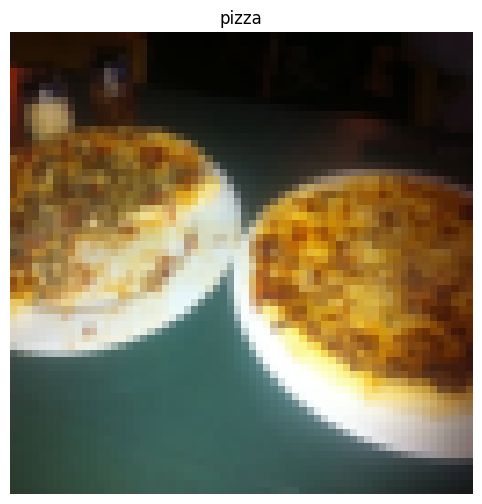

In [138]:
#rearange the order of dimension
img_permute=img.permute(1,2,0)

print(f'befoe permute ie original shape: {img.shape}')
print(f'after permute ie permute shape: {img_permute.shape}')
plt.figure(figsize=(12,6))
plt.imshow(img_permute)
plt.axis('off')
plt.title(class_names[label])

In [139]:
#turn loaded images into dataloaders
from torch.utils.data import DataLoader
train_dataloader= DataLoader(train_data, batch_size=1,num_workers=1, shuffle=True)
test_dataloader= DataLoader(test_data, batch_size=1,num_workers=1, shuffle=False)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f7d51ae3eb0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f7d51ae3880>)

In [140]:
#checking the shape
img,label=next(iter(train_dataloader))
img.shape,label.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1]))

In [141]:
#model 0 tinyvgg without data augumentation

#creatin transforms and loading data for model 0
data_transforms=transforms.Compose([
    transforms.Resize(size=(64,64), antialias=True),
    transforms.ToTensor(),])

In [142]:
from torchvision import datasets
train_data=datasets.ImageFolder(root=train_dir,transform=data_transforms)

test_data=datasets.ImageFolder(root=test_dir,transform=data_transforms)

#loading the data using dataloader
from torch.utils.data import DataLoader
BatchSize=32
NUM_WORKERS=os.cpu_count()

train_dataloader=DataLoader(train_data, batch_size=BatchSize,num_workers=NUM_WORKERS,shuffle=True)

test_dataloader=DataLoader(test_data, batch_size=BatchSize,num_workers=NUM_WORKERS,shuffle=False)

In [171]:
#creaing a tiny vff model class
from torch import nn
class TinyVGG(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int , output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(
            in_channels=input_shape,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1
            ),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units * 16*16, out_features=output_shape)
    )

  def forward(self,x):
    x=self.conv_block_1(x)
    x=self.conv_block_2(x)
    x=self.classifier(x)

    return x


torch.manual_seed(42)
model_0=TinyVGG(3,10,len(train_data.classes)).to(device)

model_0

# class TinyVGG(nn.Module):
#     """
#     Model architecture copying TinyVGG from:
#     https://poloclub.github.io/cnn-explainer/
#     """
#     def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
#         super().__init__()
#         self.conv_block_1 = nn.Sequential(
#             nn.Conv2d(in_channels=input_shape,
#                       out_channels=hidden_units,
#                       kernel_size=3, # how big is the square that's going over the image?
#                       stride=1, # default
#                       padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
#             nn.ReLU(),
#             nn.Conv2d(in_channels=hidden_units,
#                       out_channels=hidden_units,
#                       kernel_size=3,
#                       stride=1,
#                       padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2,
#                          stride=2) # default stride value is same as kernel_size
#         )
#         self.conv_block_2 = nn.Sequential(
#             nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(2)
#         )
#         self.classifier = nn.Sequential(
#             nn.Flatten(),
#             # Where did this in_features shape come from?
#             # It's because each layer of our network compresses and changes the shape of our inputs data.
#             nn.Linear(in_features=hidden_units*16*16,
#                       out_features=output_shape)
#         )

#     def forward(self, x: torch.Tensor):
#         x = self.conv_block_1(x)
#         # print(x.shape)
#         x = self.conv_block_2(x)
#         # print(x.shape)
#         x = self.classifier(x)
#         # print(x.shape)
#         return x
#         # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion

# torch.manual_seed(42)
# model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
#                   hidden_units=10,
#                   output_shape=len(train_data.classes)).to(device)
# model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [170]:
#Try a forward pass on a single image (to test the model)


In [145]:
# Use torchinfo to get an idea of the shapes going through our model

In [172]:
#creating traina and test loop functions
def training_loop(model:torch.nn.Module,dataloader: torch.utils.data.DataLoader,
                  loss_fn:torch.nn.Module,
                  optimizer: torch.optim.Optimizer):
  model.train()
  train_loss, train_acc=0,0
  for batch,(X,y) in enumerate(dataloader):
    X,y=X.to(device),y.to(device)
    y_pred=model(X)

    loss=loss_fn(y_pred,y)
    train_loss=train_loss+loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    y_pred_class=torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
    train_acc=train_acc+(y_pred_class==y).sum().item()/len(y_pred)
  train_loss=train_loss/len(dataloader)
  train_acc=train_acc/len(dataloader)
  return train_loss, train_acc

In [173]:

#testing loop
def testing_loop(model:torch.nn.Module,
                 dataloader:torch.utils.data.DataLoader,
                 loss_fn:torch.nn.Module):
  model.eval()
  test_loss,test_acc=0,0
  for batch,(X,y) in enumerate(dataloader):
    X,y=X.to(device),y.to(device)
    test_pred_logits=model(X)

    loss=loss_fn(test_pred_logits,y)
    test_loss=test_loss+loss.item()

    test_pred_labels=test_pred_logits.argmax(dim=1)
    test_acc=test_acc+(test_pred_labels==y).sum().item()/len(test_pred_labels)
  test_loss=test_loss/len(dataloader)
  test_acc=test_acc/len(dataloader)
  return test_loss,test_acc

In [174]:
def combined_fn(model:nn.Module,
                train_dataloader:torch.utils.data.DataLoader,
                test_dataloader:torch.utils.data.DataLoader,
                optimizer:torch.optim.Optimizer,
                loss_fn:torch.nn.Module=nn.CrossEntropyLoss(),
                epochs: int=5):
  #creating empty dictionary
  results={
      'train_loss':[],

      'train_acc':[],

      'test_loss':[],
      'test_acc':[]
  }

  #looping through training and testing fn
  for epoch in tqdm(range(epochs)):
    train_loss,train_acc=training_loop(model,train_dataloader,loss_fn,optimizer)
    test_loss,test_acc=testing_loop(model,test_dataloader,loss_fn)

    print(  f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
            )
    results['train_loss'].append(train_loss)

    results['train_acc'].append(train_acc)

    results['test_loss'].append(test_loss)

    results['test_acc'].append(test_acc)

  return results


In [175]:
#train and evaluate model 0
from tqdm import tqdm
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS=5
model_0=TinyVGG(3,10,len(train_data.classes)).to(device)

loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(params=model_0.parameters(),lr=0.001)

#starting the timer
from timeit import default_timer as timer
start_time=timer()

#train and test:
model_0_results=combined_fn(model_0,train_dataloader,test_dataloader,optimizer,loss_fn,NUM_EPOCHS)

end_time=timer()
print(f'total training time: {end_time-start_time:.3f} seconds')

 20%|██        | 1/5 [00:00<00:03,  1.10it/s]

Epoch: 1 | train_loss: 1.1078 | train_acc: 0.2578 | test_loss: 1.1362 | test_acc: 0.2604


 40%|████      | 2/5 [00:01<00:02,  1.11it/s]

Epoch: 2 | train_loss: 1.0846 | train_acc: 0.4258 | test_loss: 1.1622 | test_acc: 0.1979


 60%|██████    | 3/5 [00:02<00:01,  1.11it/s]

Epoch: 3 | train_loss: 1.1153 | train_acc: 0.2930 | test_loss: 1.1695 | test_acc: 0.1979


 80%|████████  | 4/5 [00:03<00:00,  1.01it/s]

Epoch: 4 | train_loss: 1.0989 | train_acc: 0.4141 | test_loss: 1.1343 | test_acc: 0.1979


100%|██████████| 5/5 [00:05<00:00,  1.06s/it]

Epoch: 5 | train_loss: 1.0990 | train_acc: 0.2930 | test_loss: 1.1434 | test_acc: 0.1979
total training time: 5.321 seconds


In [176]:
from typing import Dict, List
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """

    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

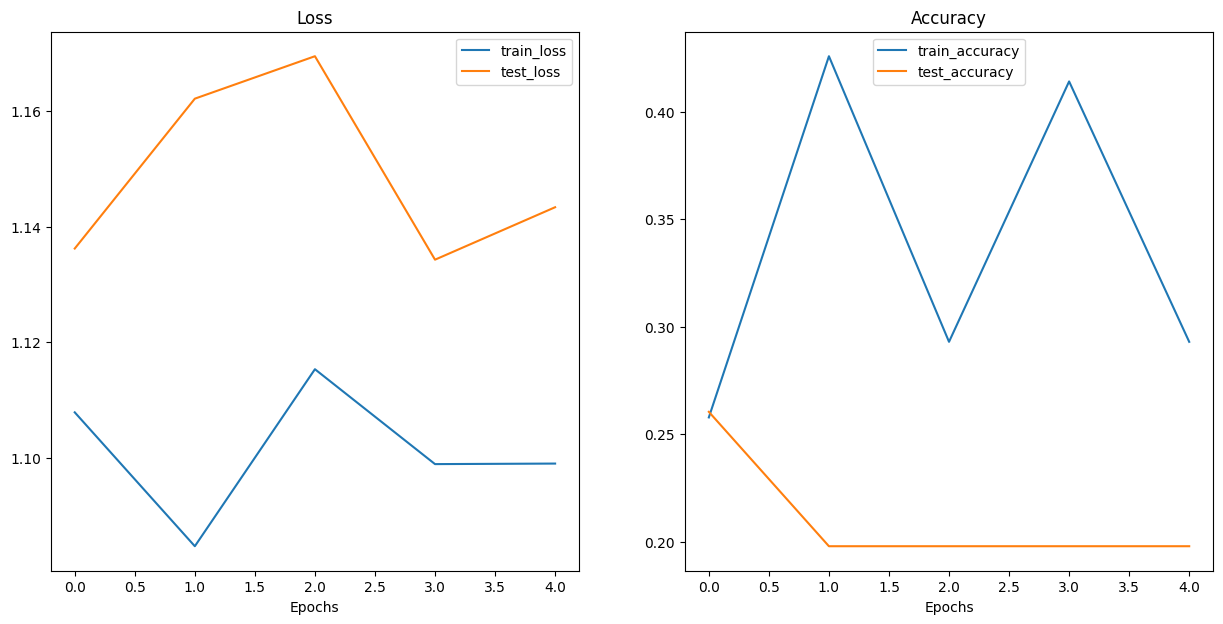

In [177]:
plot_loss_curves(model_0_results)

# this model has error , please debug later

In [178]:
#creating aother model ie model 1 tiny vgg with data augumnetation
#creating training transform
train_transform_trival_augument=transforms.Compose([transforms.Resize(size=(64,64)),
                                                   transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                                   transforms.ToTensor()])

#creating testing transform
test_transform_trival_augument=transforms.Compose([transforms.Resize(size=(64,64)),

                                                   transforms.ToTensor()])



In [179]:
#creating train and test dataset and dataloaders
train_data_augumented=datasets.ImageFolder(train_dir, transform=train_transform_trival_augument)

test_data_simple=datasets.ImageFolder(test_dir, transform=test_transform_trival_augument)
train_data_augumented, test_data_simple

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [180]:
#turning datasets into dataloader
import os
batch_size=32
num_workers=os.cpu_count()

torch.manual_seed(42)

train_data_loader_augumented=DataLoader(train_data_augumented,batch_size,shuffle=True,num_workers=num_workers)
test_data_loader_augumented=DataLoader(test_data_simple,batch_size,shuffle=False,num_workers=num_workers)


In [181]:
#constructing and training the new model

torch.manual_seed(42)
model_1=TinyVGG(input_shape=3,hidden_units=10,output_shape=len(train_data_augumented.classes)).to(device)

In [182]:
#time to train
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs=5
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(params=model_1.parameters(),lr=0.001)

#starting the timer
from timeit import default_timer as timer
start_time=timer()

#training the model
model_1_results=combined_fn(model_1,
                train_data_loader_augumented,
                test_data_loader_augumented,
                optimizer,
                loss_fn,
                epochs)
end_time=timer()

print(f'toral training time : {end_time-start_time}')


 20%|██        | 1/5 [00:00<00:03,  1.04it/s]

Epoch: 1 | train_loss: 1.1076 | train_acc: 0.2500 | test_loss: 1.1062 | test_acc: 0.2604


 40%|████      | 2/5 [00:01<00:02,  1.03it/s]

Epoch: 2 | train_loss: 1.0791 | train_acc: 0.4258 | test_loss: 1.1387 | test_acc: 0.2604


 60%|██████    | 3/5 [00:02<00:01,  1.03it/s]

Epoch: 3 | train_loss: 1.0810 | train_acc: 0.4258 | test_loss: 1.1695 | test_acc: 0.2604


 80%|████████  | 4/5 [00:03<00:00,  1.02it/s]

Epoch: 4 | train_loss: 1.1291 | train_acc: 0.3047 | test_loss: 1.1622 | test_acc: 0.2604


100%|██████████| 5/5 [00:04<00:00,  1.01it/s]

Epoch: 5 | train_loss: 1.0901 | train_acc: 0.4258 | test_loss: 1.1476 | test_acc: 0.2604
toral training time : 4.965858845000184


In [183]:
model_1_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

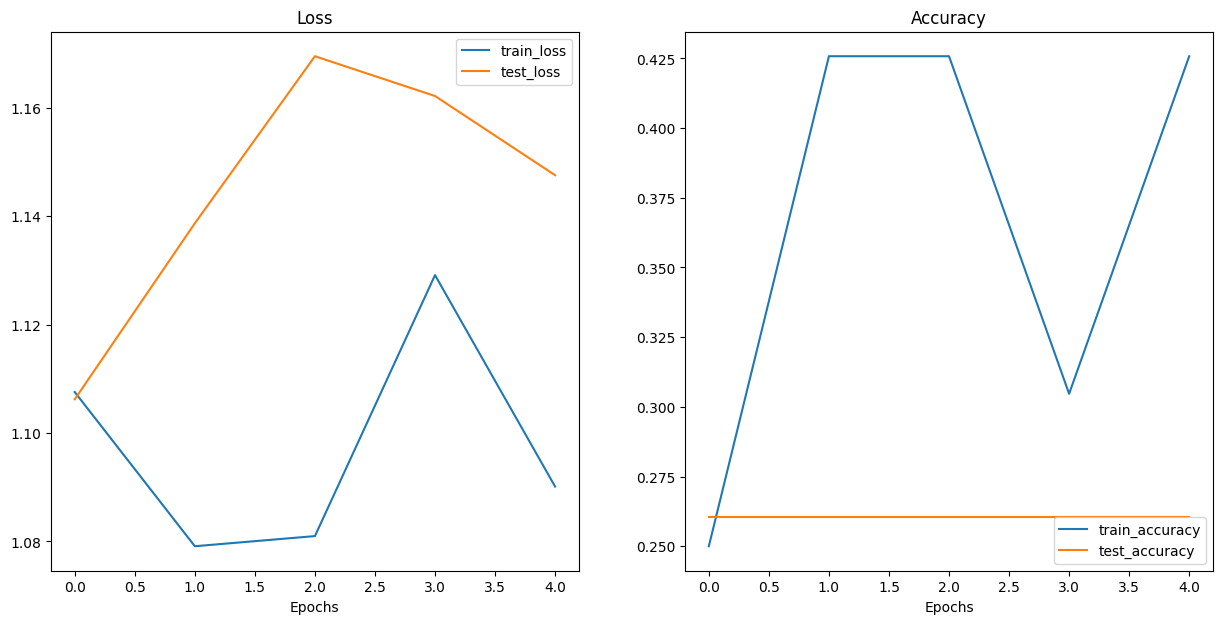

In [184]:
plot_loss_curves(model_1_results)

In [186]:
#comparing the model results

import pandas as pd
model_0_df=pd.DataFrame(model_0_results)

model_1_df=pd.DataFrame(model_1_results)

model_0_df, model_1_df

(   train_loss  train_acc  test_loss  test_acc
 0    1.107836   0.257812   1.136208  0.260417
 1    1.084645   0.425781   1.162168  0.197917
 2    1.115306   0.292969   1.169520  0.197917
 3    1.098868   0.414062   1.134279  0.197917
 4    1.098961   0.292969   1.143362  0.197917,
    train_loss  train_acc  test_loss  test_acc
 0    1.107564   0.250000   1.106223  0.260417
 1    1.079112   0.425781   1.138703  0.260417
 2    1.080982   0.425781   1.169533  0.260417
 3    1.129143   0.304688   1.162188  0.260417
 4    1.090118   0.425781   1.147575  0.260417)

In [187]:
#making predictions on custom image

# Download custom image
import requests

# Setup custom image path
custom_image_path = data_path / "04-pizza-dad.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")

In [188]:
#loading in custom image with pyrotch
import torchvision

# Read in custom image
custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))

# Print out image data
print(f"Custom image tensor:\n{custom_image_uint8}\n")
print(f"Custom image shape: {custom_image_uint8.shape}\n")
print(f"Custom image dtype: {custom_image_uint8.dtype}")


Custom image tensor:
tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)

Custom image shape: torch.Size([3, 4032, 3024])

Custom image dty

In [189]:
model_1.eval()

with torch.inference_mode():
  model_1(custom_image_uint8.to(device))

RuntimeError: Input type (unsigned char) and bias type (float) should be the same

In [190]:
# Load in custom image and convert the tensor values to float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

# Divide the image pixel values by 255 to get them between [0, 1]
custom_image = custom_image / 255.

# Print out image data
print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")

Custom image tensor:
tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..

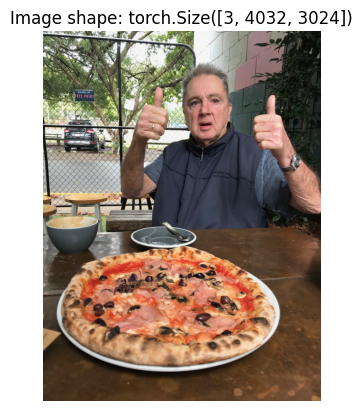

In [191]:
# Plot custom image
plt.imshow(custom_image.permute(1, 2, 0)) # need to permute image dimensions from CHW -> HWC otherwise matplotlib will error
plt.title(f"Image shape: {custom_image.shape}")
plt.axis(False);

In [193]:
# Create transform pipleine to resize image
custom_image_transform = transforms.Compose([
    transforms.Resize((64, 64)),
])

# Transform target image
custom_image_transformed = custom_image_transform(custom_image)

# Print out original shape and new shape
print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 4032, 3024])
New shape: torch.Size([3, 64, 64])


In [195]:
model_1.eval()
with torch.inference_mode():
    custom_image_pred = model_1(custom_image_transformed.to(device))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x256 and 2560x3)

In [196]:
model_1.eval()
with torch.inference_mode():
    # Add an extra dimension to image
    custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)

    # Print out different shapes
    print(f"Custom image transformed shape: {custom_image_transformed.shape}")
    print(f"Unsqueezed custom image shape: {custom_image_transformed_with_batch_size.shape}")

    # Make a prediction on image with an extra dimension
    custom_image_pred = model_1(custom_image_transformed.unsqueeze(dim=0).to(device))

Custom image transformed shape: torch.Size([3, 64, 64])
Unsqueezed custom image shape: torch.Size([1, 3, 64, 64])


In [197]:
custom_image_pred


tensor([[ 0.1181,  0.0340, -0.1460]], device='cuda:0')

In [198]:
# Print out prediction logits
print(f"Prediction logits: {custom_image_pred}")

# Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
print(f"Prediction probabilities: {custom_image_pred_probs}")

# Convert prediction probabilities -> prediction labels
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(f"Prediction label: {custom_image_pred_label}")

Prediction logits: tensor([[ 0.1181,  0.0340, -0.1460]], device='cuda:0')
Prediction probabilities: tensor([[0.3721, 0.3421, 0.2858]], device='cuda:0')
Prediction label: tensor([0], device='cuda:0')


In [199]:
# Find the predicted label
custom_image_pred_class = class_names[custom_image_pred_label.cpu()] # put pred label to CPU, otherwise will error
custom_image_pred_class

'pizza'